In [1]:
from hapi import*
import pandas as pd

HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
db_begin('data')

Using data

H2O_13
                     Lines parsed: 170
H2O_07
                     Lines parsed: 585
H2O
                     Lines parsed: 251
CO2
                     Lines parsed: 3
H2O_14
                     Lines parsed: 251


In [3]:
#--- convert wavelengths to wavenumber
wl_start = 10.8e-6 #m
wl_end = 11.6e-6 #m

wn_start = round((1/wl_start)/100, 2) #cm-1
wn_end = round((1/wl_end)/100, 2) #cm-1

print('Wavenumbers from ' + str(wn_start) +' to '+ str(wn_end))

Wavenumbers from 925.93 to 862.07


In [4]:
#--- fetch(name of table with data, molecule number, isotopologue number, wavenumber start, wavenumber end)

fetch('H2O',1,1,wn_end,wn_start)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 251
PROCESSED


In [5]:
tableList()

dict_keys(['sampletab', 'H2O_13', 'H2O_07', 'H2O', 'CO2', 'H2O_14'])

In [6]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 862.070-925.930 wavenumber range
Number of rows: 251
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag       

In [7]:
mol_id=1
iso_id=1
abundance(mol_id,iso_id)

0.9973173

HITRAN units = True means that we are using cm2 molec-1. If this were set to False, we would be using cm-1. 

In [8]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':217.,'p':0.100666}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))

{'self': 1.0}
0.058240 seconds elapsed for abscoef; nlines = 251
5.804861591771796e-23


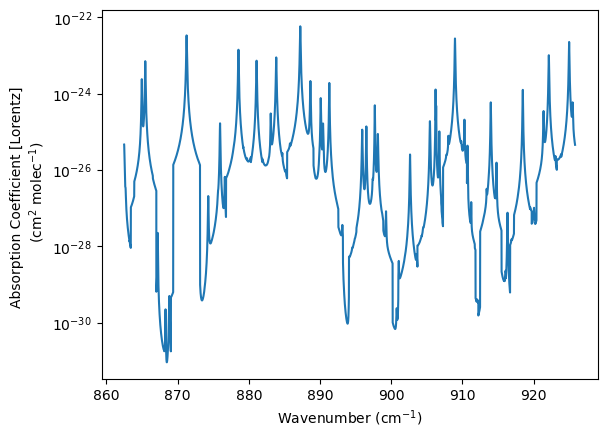

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

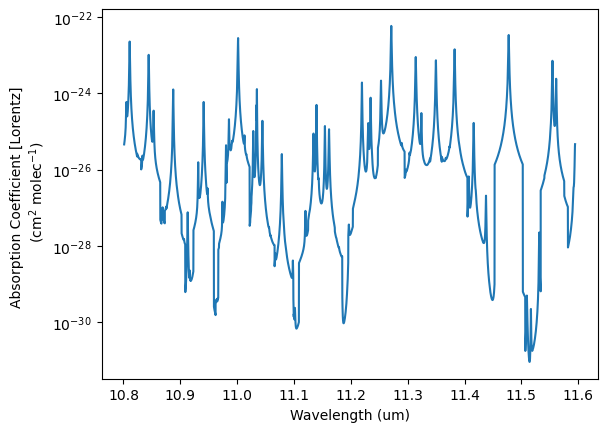

In [10]:
wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots()
ax.semilogy(wl,coef)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

{'self': 1.0}
0.150986 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.042911 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.066049 seconds elapsed for abscoef; nlines = 251


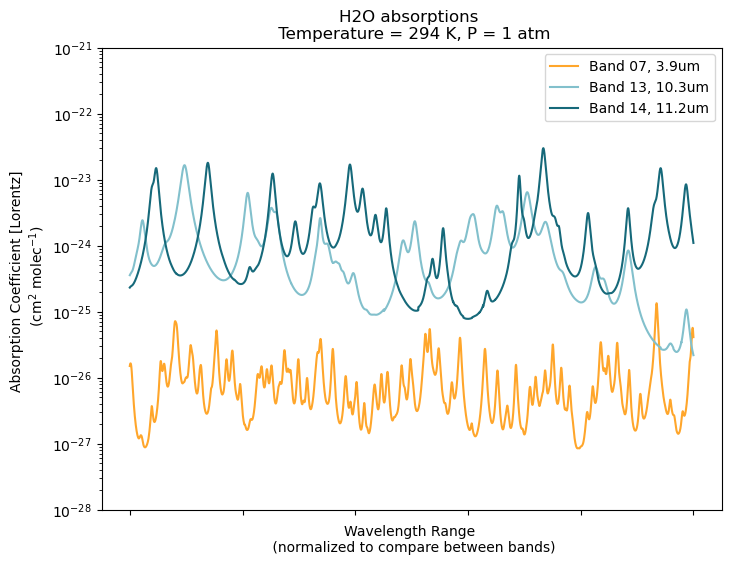

In [11]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-29, 10e-22])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Converting the cm2 molec-1 to m2 kg-1:

In [12]:
#--- mass of water
m_water = 18.01528/1000 #kg mole-1
#--- mole
molec_mole = 6.022e23 #molec mole-1
#--- kg molec-1
kg_molec = m_water*(1/molec_mole)

print(kg_molec)

2.991577548987048e-26


{'self': 1.0}
0.152185 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.043016 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.063752 seconds elapsed for abscoef; nlines = 251


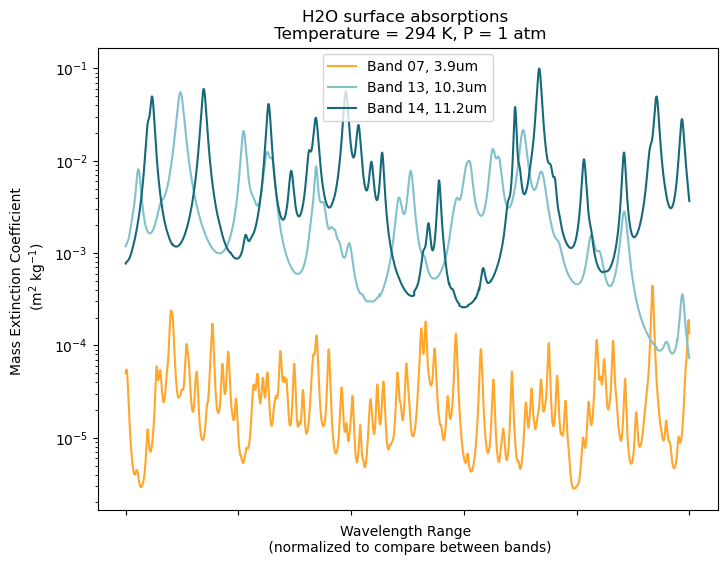

In [13]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

#--- convert cm2/molec to m2/kg
mass_ext_07 = (coef_07/(100**2))/kg_molec
mass_ext_13 = (coef_13/(100**2))/kg_molec
mass_ext_14 = (coef_14/(100**2))/kg_molec

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,mass_ext_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,mass_ext_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,mass_ext_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
#ax.set_ylim([10e20, 10e26])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Mass Extinction Coefficient \n (m$^{2}$ kg$^{-1}$)')
ax.set_title('H2O surface absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()


{'self': 1.0}
0.151668 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.042635 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.063375 seconds elapsed for abscoef; nlines = 251


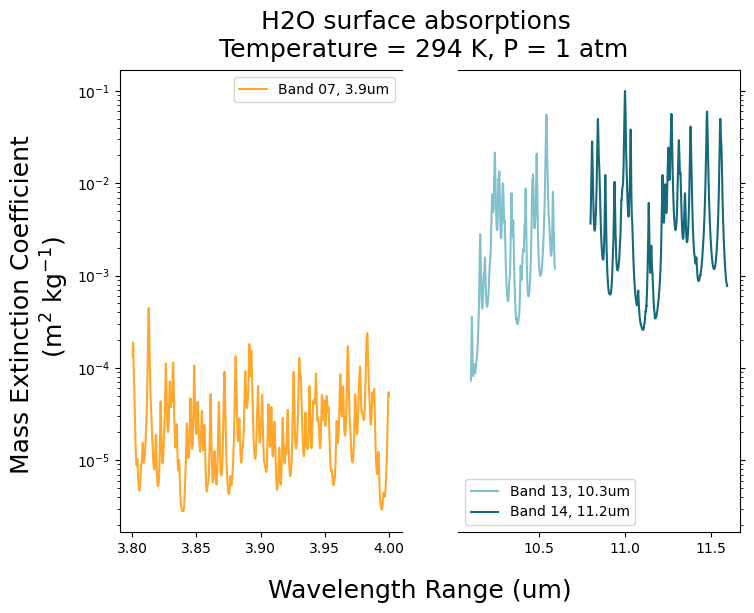

In [14]:
#---Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

#---Convert cm2/molec to m2/kg
mass_ext_07 = (coef_07/(100**2))/kg_molec
mass_ext_13 = (coef_13/(100**2))/kg_molec
mass_ext_14 = (coef_14/(100**2))/kg_molec

#---Convert wavenumber (cm-1) to wavelength (um)
wl_07 = (1/(nu_07*100))*1e6
wl_13 = (1/(nu_13*100))*1e6
wl_14 = (1/(nu_14*100))*1e6

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax.semilogy(wl_07,mass_ext_07, label='Band 07, 3.9um', c='#FFA62B')
ax2.semilogy(wl_13,mass_ext_13, label='Band 13, 10.3um', c='#82C0CC')
ax2.semilogy(wl_14,mass_ext_14, label='Band 14, 11.2um', c='#16697A')

ax.legend()
ax2.legend()

#---Hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()

#ax.legend()
#ax.set_xlabel('Wavelength Range (um)', size=18)
fig.text(x=0.5, y=0, s='Wavelength Range (um)', ha='center', fontsize=18)
ax.set_ylabel('Mass Extinction Coefficient \n (m$^{2}$ kg$^{-1}$)', size=18)
fig.suptitle('H2O surface absorptions \n Temperature = 294 K, P = 1 atm', fontsize=18)
plt.show()

Using the 1/cm units instead:

{'self': 1.0}
0.153662 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.044524 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.064651 seconds elapsed for abscoef; nlines = 251


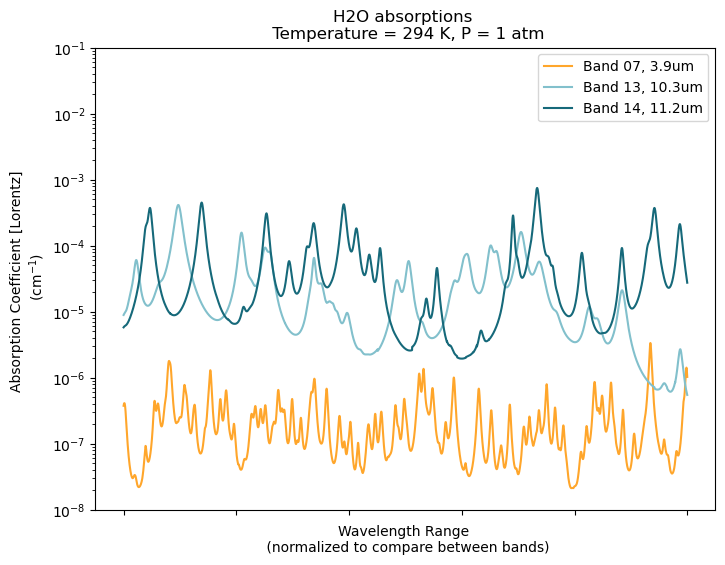

In [15]:
#--- Using surface-level temperature and pressure
nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)


nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-9, 10e-2])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Creating a look-up-table of mass extinction coefficients (K) by the input temperature and pressure:

In [16]:
#--- Set the standard colorbar ranges for the plots
ext_min=0
ext_max=0.006

In [17]:
#--- Setting the temperature and pressure ranges
T07 = np.arange(175, 305, 5)
p07 = np.arange(1, 0, -0.05)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg07 = []

# Loop through temperature and pressure combinations
for temp in T07:
    for pres in p07:
        nu_07, coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_07 = (coef_07 / (100 ** 2)) / kg_molec
        mass_ext_avg07.append(np.mean(mass_ext_07))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_07))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg07 = np.array(mass_ext_avg07).reshape(len(T07), len(p07))

{'self': 1.0}
0.160357 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 1.0 mass ext average: 8.262081807598267e-07
{'self': 1.0}
0.155512 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.95 mass ext average: 8.265468971592963e-07
{'self': 1.0}
0.153638 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.8999999999999999 mass ext average: 8.268711006732165e-07
{'self': 1.0}
0.153679 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.8499999999999999 mass ext average: 8.271867227314018e-07
{'self': 1.0}
0.149742 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.7999999999999998 mass ext average: 8.27519183120856e-07
{'self': 1.0}
0.149841 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.7499999999999998 mass ext average: 8.278693749028798e-07
{'self': 1.0}
0.148403 seconds elapsed for abscoef; nlines = 585
temp: 175 press: 0.6999999999999997 mass ext average: 8.28241673559721e-07
{'self': 1.0}
0.146440 seconds elapsed for a

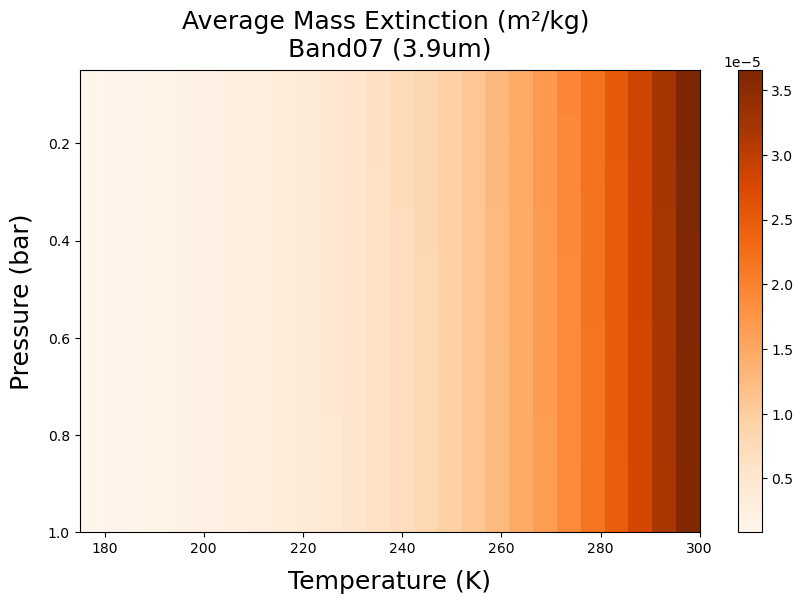

In [18]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg07), extent=[T07[0], T07[-1], p07[0], p07[-1]], aspect='auto', origin='lower', cmap='Oranges')
img.set_clim(vmin=np.min(mass_ext_avg07), vmax=np.max(mass_ext_avg07))

cbar = plt.colorbar(img)
plt.xlabel('Temperature (K)', size=18, labelpad=10)
plt.ylabel('Pressure (bar)', size=18, labelpad=10)
plt.title('Average Mass Extinction (m²/kg) \n Band07 (3.9um) ', size=18, pad=10)
plt.show()

In [19]:
#--- Setting the temperature and pressure ranges
T14 = np.arange(175, 305, 5)
p14 = np.arange(1, 0, -0.05)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg14 = []

# Loop through temperature and pressure combinations
for temp in T14:
    for pres in p14:
        nu_14, coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_14 = (coef_14 / (100 ** 2)) / kg_molec
        mass_ext_avg14.append(np.mean(mass_ext_14))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_14))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg14 = np.array(mass_ext_avg14).reshape(len(T14), len(p14))

{'self': 1.0}
0.068107 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 1.0 mass ext average: 0.00030511812051352895
{'self': 1.0}
0.064910 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.95 mass ext average: 0.00030547025079958007
{'self': 1.0}
0.064606 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.8999999999999999 mass ext average: 0.0003058255255514915
{'self': 1.0}
0.064372 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.8499999999999999 mass ext average: 0.00030617862775061657
{'self': 1.0}
0.063936 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.7999999999999998 mass ext average: 0.0003065299378464132
{'self': 1.0}
0.062774 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.7499999999999998 mass ext average: 0.00030688096952647336
{'self': 1.0}
0.061746 seconds elapsed for abscoef; nlines = 251
temp: 175 press: 0.6999999999999997 mass ext average: 0.0003072367702424978
{'self': 1.0}
0.062235 seconds elapsed

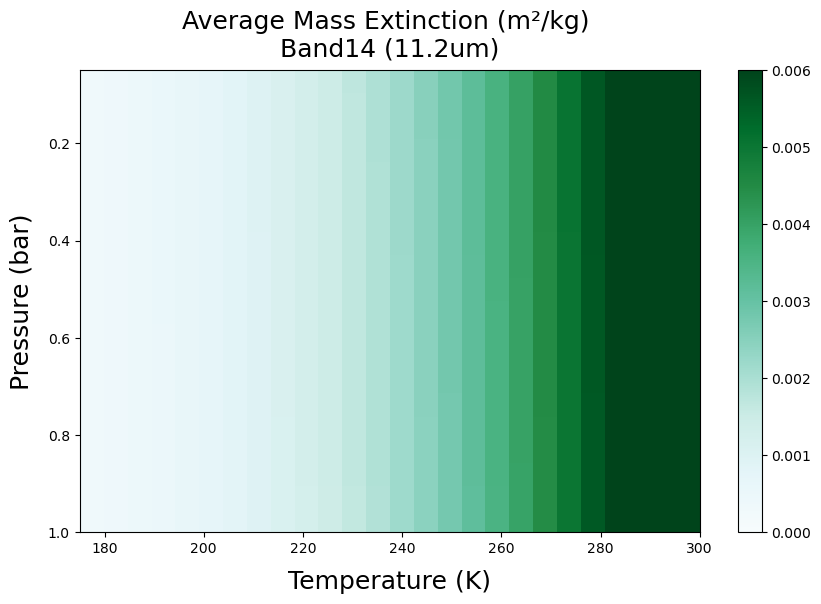

In [20]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg14), extent=[T14[0], T14[-1], p14[0], p14[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

cbar = plt.colorbar(img)
plt.xlabel('Temperature (K)', size=18, labelpad=10)
plt.ylabel('Pressure (bar)', size=18, labelpad=10)
plt.title('Average Mass Extinction (m²/kg) \n Band14 (11.2um) ', size=18, pad=10)
plt.show()

In [21]:
#--- Setting the temperature and pressure ranges
T13 = np.arange(175, 305, 5)
p13 = np.arange(1, 0, -0.05)  # Adjusted pressure range

# Initialize empty lists to store results
mass_ext_avg13 = []

# Loop through temperature and pressure combinations
for temp in T13:
    for pres in p13:
        nu_13, coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T': temp, 'p': pres}, Diluent={'self': 1.0}, WavenumberStep=0.001, HITRAN_units=True)
        mass_ext_13 = (coef_13 / (100 ** 2)) / kg_molec
        mass_ext_avg13.append(np.mean(mass_ext_13))  # Calculate and store the average mass_ext_07
        print('temp:', temp, 'press:', pres, 'mass ext average:', np.mean(mass_ext_13))

# Reshape the average mass_ext_07 for plotting
mass_ext_avg13 = np.array(mass_ext_avg13).reshape(len(T13), len(p13))

{'self': 1.0}
0.045514 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 1.0 mass ext average: 8.86898092784478e-05
{'self': 1.0}
0.043594 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.95 mass ext average: 8.878425010321538e-05
{'self': 1.0}
0.043892 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.8999999999999999 mass ext average: 8.887877276472553e-05
{'self': 1.0}
0.042888 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.8499999999999999 mass ext average: 8.897299706697083e-05
{'self': 1.0}
0.043184 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.7999999999999998 mass ext average: 8.906713440816502e-05
{'self': 1.0}
0.041560 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.7499999999999998 mass ext average: 8.915793884073425e-05
{'self': 1.0}
0.043208 seconds elapsed for abscoef; nlines = 170
temp: 175 press: 0.6999999999999997 mass ext average: 8.924762088011624e-05
{'self': 1.0}
0.040793 seconds elapsed for 

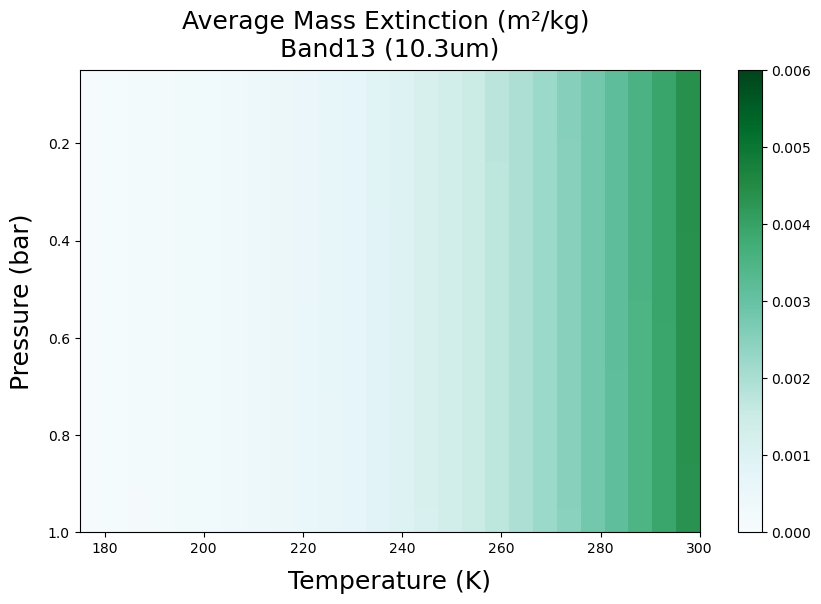

In [22]:
# Plot
plt.figure(figsize=(10, 6))

img = plt.imshow(np.transpose(mass_ext_avg13), extent=[T13[0], T13[-1], p13[0], p13[-1]], aspect='auto', origin='lower', cmap='BuGn')
img.set_clim(vmin=ext_min, vmax=ext_max)

cbar = plt.colorbar(img)
plt.xlabel('Temperature (K)', size=18, labelpad=10)
plt.ylabel('Pressure (bar)', size=18, labelpad=10)
plt.title('Average Mass Extinction (m²/kg) \n Band13 (10.3um) ', size=18, pad=10)
plt.show()

In [23]:
#---Converting pressure from atm to hPa
p13_hPa = p13/0.000987

#---Creating the dataframe for the look-up-table
mass_ext_df_13 = pd.DataFrame(mass_ext_avg13, index=T13, columns=p13_hPa)
mass_ext_df_13

#---Repeating for the other bands
p14_hPa = p14/0.000987
mass_ext_df_14 = pd.DataFrame(mass_ext_avg14, index=T14, columns=p14_hPa)

p07_hPa = p07/0.000987
mass_ext_df_07 = pd.DataFrame(mass_ext_avg07, index=T07, columns=p07_hPa)

In [24]:
mass_ext_df_13.to_pickle('tables/mass_ext_band13')
mass_ext_df_14.to_pickle('tables/mass_ext_band14')
mass_ext_df_07.to_pickle('tables/mass_ext_band07')